WARNING unknown integrator type loadControl
WARNING analysis Static - no Integrator specified, 
 StaticIntegrator default will be used


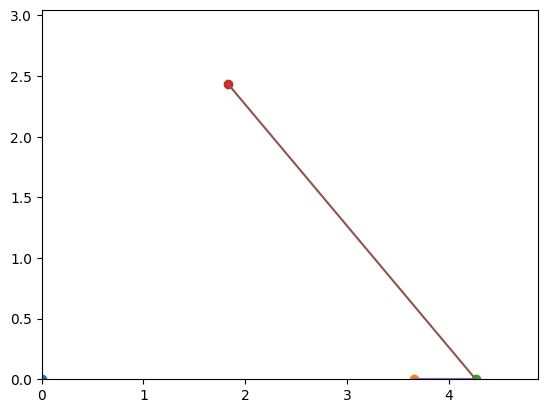

In [1]:
import openseespywin.opensees as op
import matplotlib.pyplot as plt


# Units

m = 1
N = 1
Pa = 1
inches = 0.0254 * m
ft = 12 * inches
kip = 4.45*(10**3)*N
ksi = 6.89*(10**6)*Pa

#Input Variables
x1 = 0
y1 = 0

x2 = 12*ft
y2 = 0


x3 = 14*ft
y3 = 0


x4 = 6*ft
y4 = 8*ft

A1 = 10*(inches**2)
A2 = 5*(inches**2)
E = 3000*ksi
Px = 100*kip
Py = -50*kip


#Opensees Analysis

#Remove existing model
op.wipe()

#set node builder
op.model('basic','-ndm',2,'-ndf',3)

#Define materials
op.uniaxialMaterial("Elastic",1,E)

#Create nodes
op.node(1,x1,y1)
op.node(2,x2,y2)
op.node(3,x3,y3)
op.node(4,x4,y4)

#Set boundary conditions
op.fix(1,1,1,1)
op.fix(2,1,1,1)
op.fix(3,1,1,1)
op.fix(4,0,0,1)

#Define elements
op.element('Truss',1,1,4,A1,1)
op.element('Truss',2,2,4,A2,1)
op.element('Truss',3,3,4,A2,1)

#TimeSeries (For earthquake)
op.timeSeries("Linear",1)

#Create a plain load pattern
op.pattern("Plain",1,1)

#Create the nodal load comand
op.load(4,Px,Py,0)


#Por ultimo
#Create SOE
op.system("BandSPD")

#Create DOF number
op.numberer("RCM")

#Create constraint handler
op.constraints("Plain")

#Create integrator
op.integrator("loadControl",1.0)

#Create algorithm
op.algorithm("Newton")

#Create analysis Object
op.analysis("Static")

#Perform the analysis
ok = op.analyze(1)


# Define the properties of the structure

# Number of nodes
n_nodes = 4

# Node coordinates
x_coordinates = [0, 12*ft, 14*ft, 6*ft]
y_coordinates = [0, 0, 0, 8*ft]

# Element connectivity
element_connectivity = [[1, 2], [2, 3]]

# Element properties
element_properties = [A1, A2, A2]

# Plot the structure

# Create a figure
fig, ax = plt.subplots()

# Plot the nodes
for i in range(n_nodes):
    ax.plot(x_coordinates[i], y_coordinates[i], 'o')

# Plot the elements
for i in range(3):
    if i < len(element_connectivity):
        ax.plot([x_coordinates[element_connectivity[i][0]], x_coordinates[element_connectivity[i][1]]],
                [y_coordinates[element_connectivity[i][0]], y_coordinates[element_connectivity[i][1]]],
                '-')



# Set the axes limits
ax.set_xlim([0, 16*ft])
ax.set_ylim([0, 10*ft])

# Show the plot
plt.show()